In [1]:
import pandas as pd
data_iris = pd.read_csv('/root/experiment/datas/iris.csv')
data_iris.shape

(150, 5)

In [2]:
data_iris.sample(5)

,sepal_l,sepal_w,petal_l,petal_w,classes
110,6.5,3.2,5.1,2.0,2
132,6.4,2.8,5.6,2.2,2
113,5.7,2.5,5.0,2.0,2
89,5.5,2.5,4.0,1.3,1
123,6.3,2.7,4.9,1.8,2


In [3]:
data_iris.describe()

,sepal_l,sepal_w,petal_l,petal_w,classes
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [4]:
data_iris.isnull().sum()

sepal_l    0
sepal_w    0
petal_l    0
petal_w    0
classes    0
dtype: int64

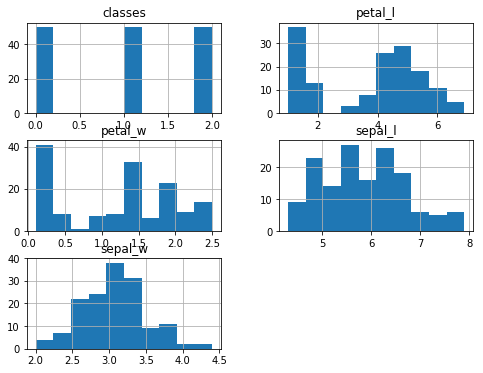

In [13]:
import matplotlib.pyplot as plt
data_iris.hist(figsize=(8,6))
plt.show()

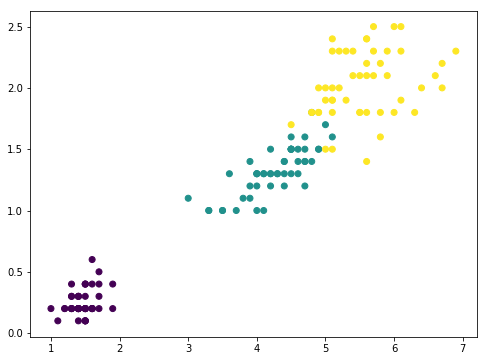

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(x=data_iris['petal_l'], y=data_iris['petal_w'],c=data_iris['classes'])
plt.show()

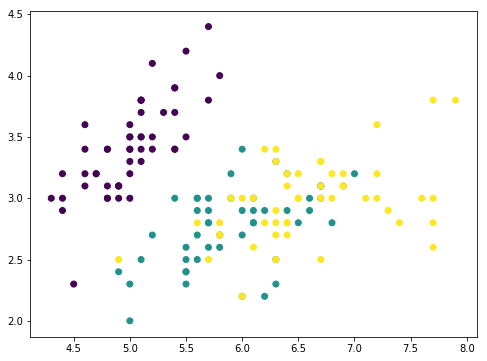

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(x=data_iris['sepal_l'], y=data_iris['sepal_w'],c=data_iris['classes'])
plt.show()

In [8]:
X = data_iris.iloc[:,:-1]
y = data_iris.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [9]:
import xgboost as xgb
params = {
    'learning_rate':0.2,
    'n_estimators':2,
    'max_depth':2,
    'min_child_weight':1,
    'gamma':0,
    'subsample':0.8,
    'colsample_bytree':0.8,
    'silent':True,
    'objective':'multi:softmax',
}
model = xgb.XGBClassifier(**params)
from sklearn.model_selection import GridSearchCV
grid_params = {
        'min_child_weight':[x for x in range(2,6)]
}

grid = GridSearchCV(model,grid_params,cv=3)
grid.fit(X_train,y_train)

/usr/lib/python3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/lib/python3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/lib/python3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/lib/python3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Return

GridSearchCV(cv=3, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=2,
       n_jobs=1, nthread=None, objective='multi:softmax', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_child_weight': [2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [10]:
grid.best_params_

{'min_child_weight': 2}

In [11]:
print("Accuracy:{0:.1f}%".format(100*grid.best_score_))

Accuracy:96.7%


In [12]:
params = {
    'learning_rate':0.2,
    'n_estimators':3,
    'max_depth':2,
    'min_child_weight':2,
    'gamma':0,
    'subsample':0.8,
    'colsample_bytree':0.8,
    'silent':True,
    'objective':'multi:softmax',
}
model = xgb.XGBClassifier(**params) 
model.fit(X_train, y_train,eval_set=[(X_train, y_train), (X_test, y_test)], eval_metric='merror')
model.evals_result()

[0]	validation_0-merror:0.033333	validation_1-merror:0.033333
[1]	validation_0-merror:0.033333	validation_1-merror:0.1
[2]	validation_0-merror:0.025	validation_1-merror:0.1


{'validation_0': {'merror': [0.033333, 0.033333, 0.025]},
 'validation_1': {'merror': [0.033333, 0.1, 0.1]}}